In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results_path = "../reports"

metric_list = ["Dice","HD","SurfaceDSC","SurfaceDistance"]

model_list = ["UNet++", "AttentionUNet", "UNet", "VNet", "NoSkipUNet", "NoSkipVNet"]
model_alias = {"UNet++": "UNet++", "AttentionUNet": "Attention U-Net", "UNet": "U-Net", "VNet": "V-Net", "NoSkipUNet": "NoSkipU-Net", "NoSkipVNet": "NoSkipV-Net"}

anatomy_list = ["GLaS", "Heart", "Spleen"] # "BUSI", 
anatomy_alias = {"BUSI": "Breast \n (Ultrasound)", "GLaS": "Colon \n (Histology)", "Heart": "Heart \n (MRI)", "Spleen": "Spleen \n (CT)"}

variant_list = ["lower", "low", "in-domain", "high", "higher"]
variant_alias = {"lower": "Hardest", "low": "Harder", "in-domain": "Unperturbed", "high": "Easier", "higher": "Easiest"}

/var/folders/yr/q_0gpqgs1lq_rtbttpk3n9bh0000gn/T/ipykernel_85773/1784336961.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


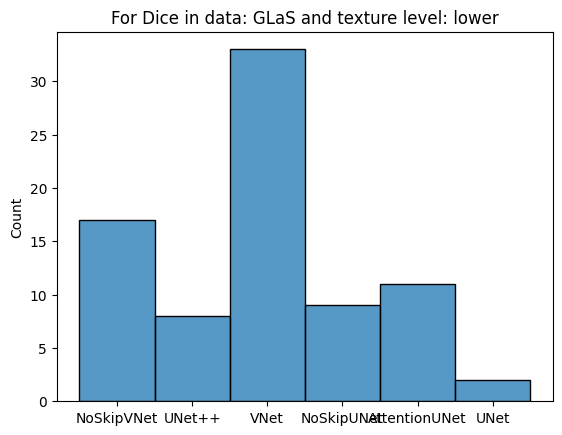

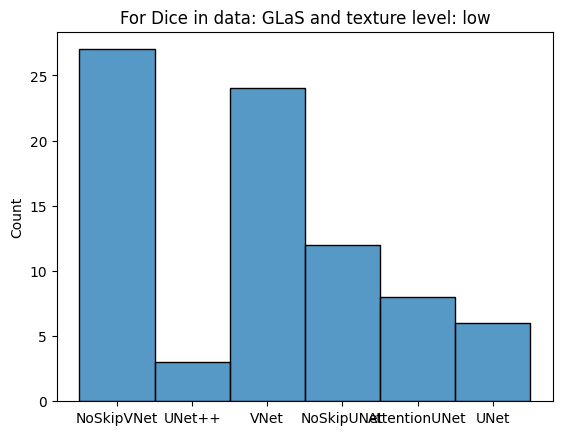

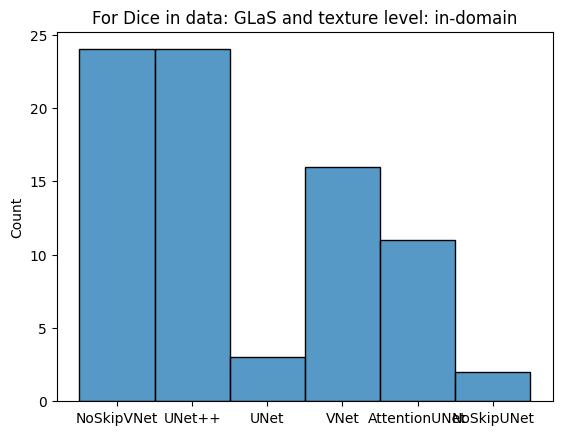

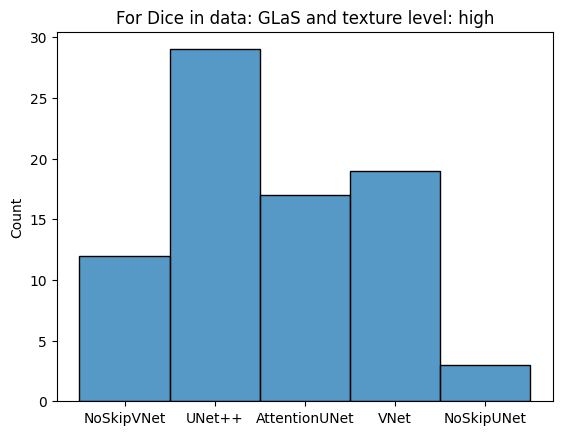

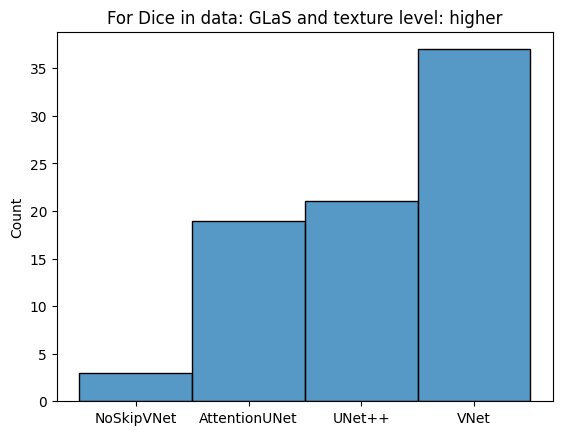

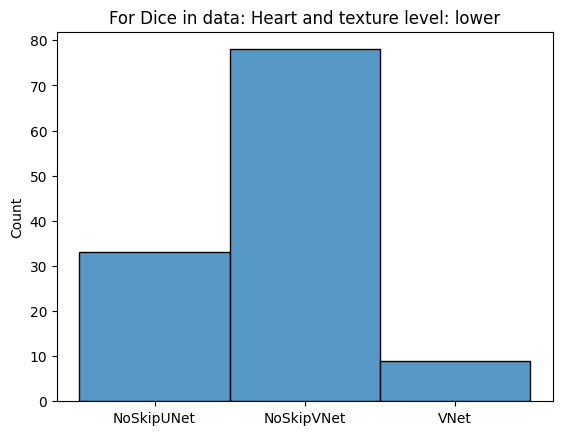

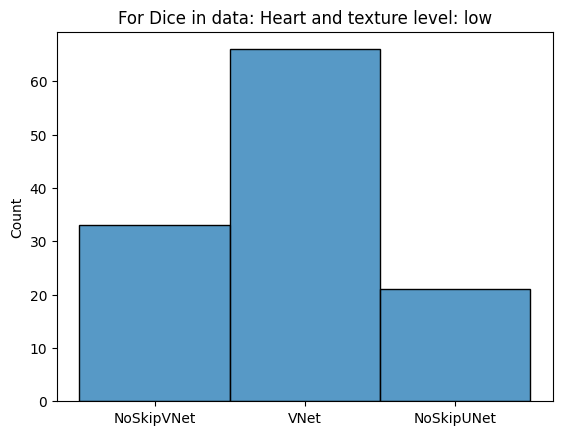

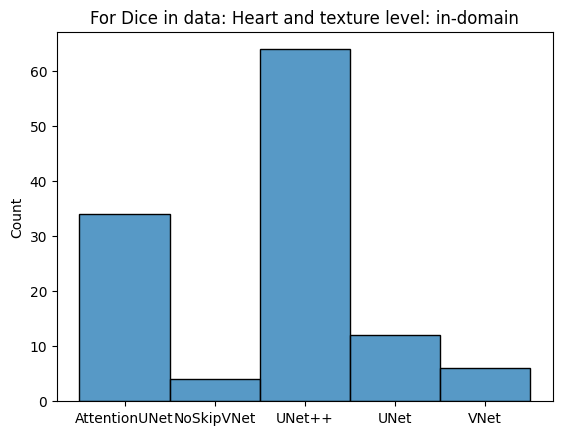

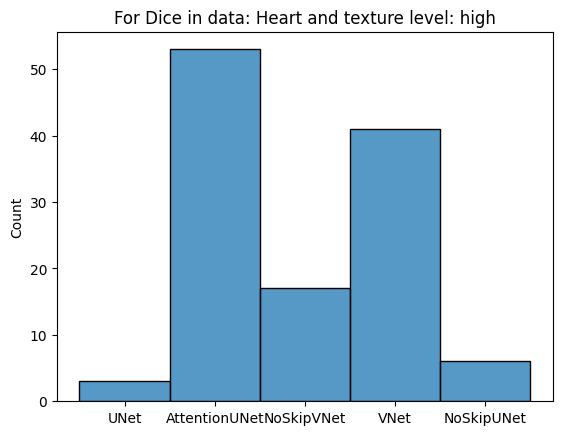

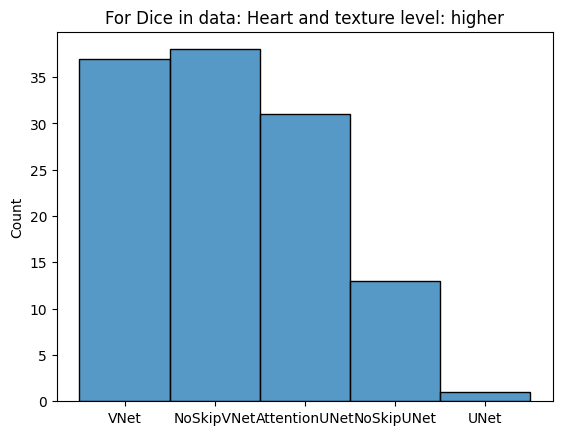

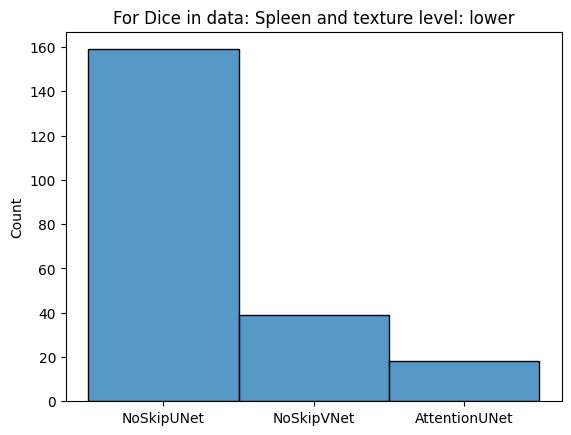

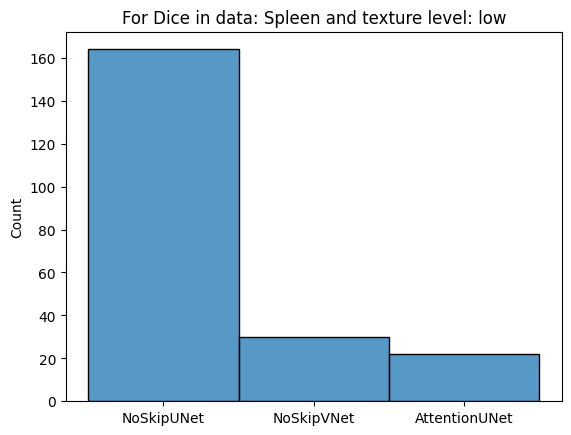

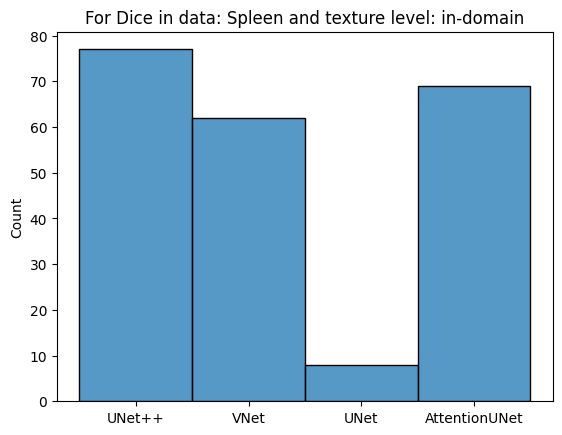

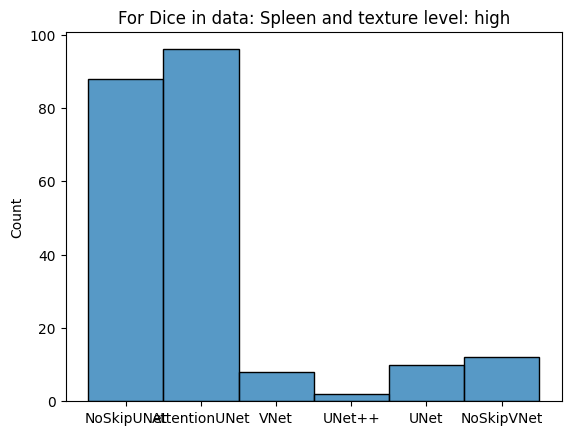

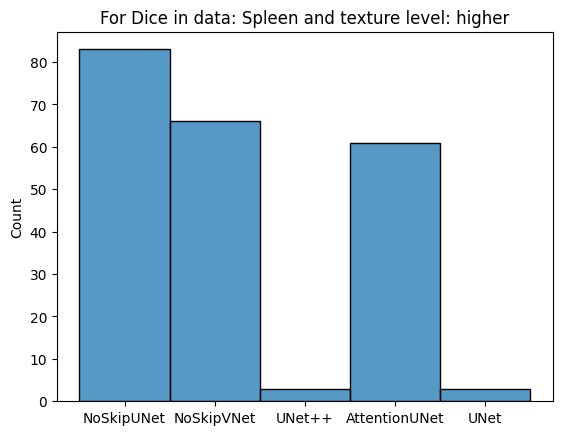

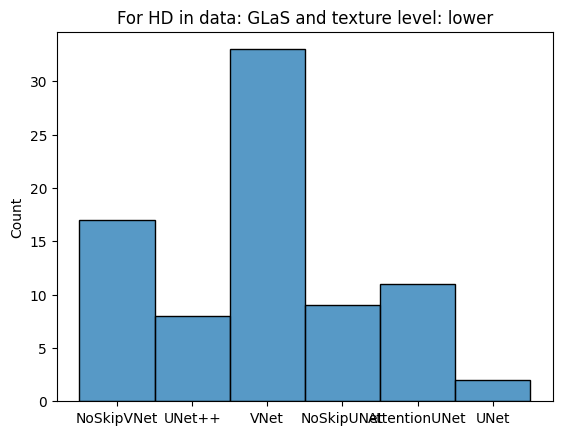

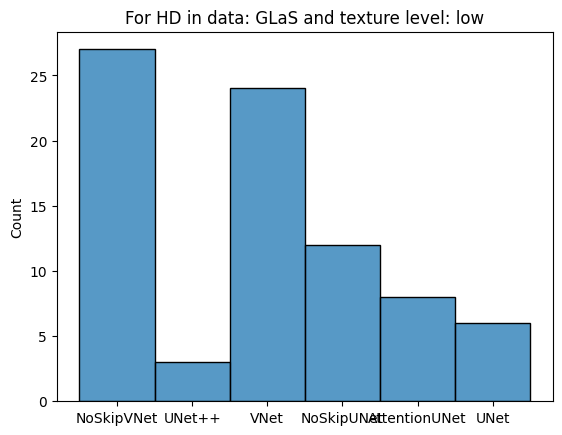

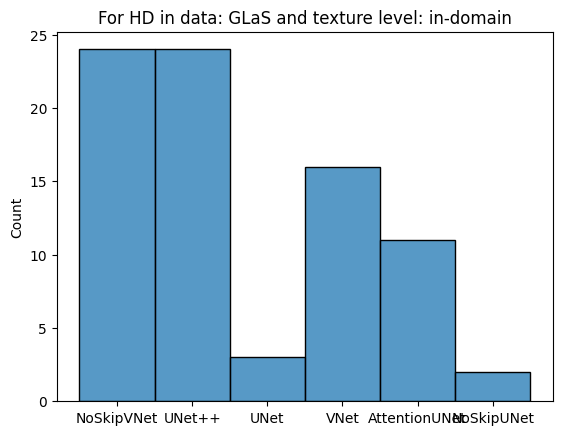

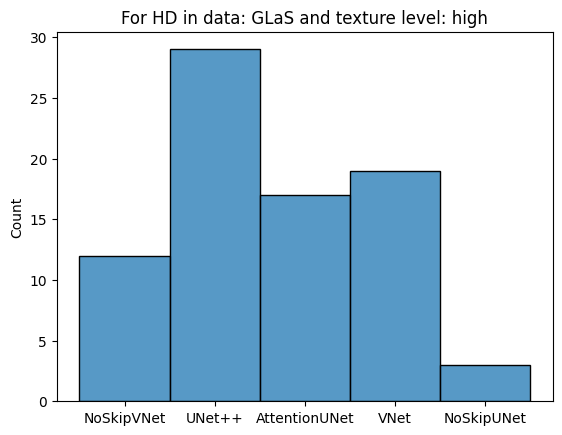

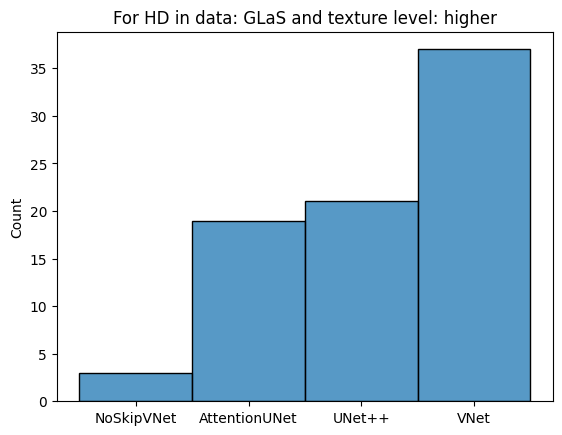

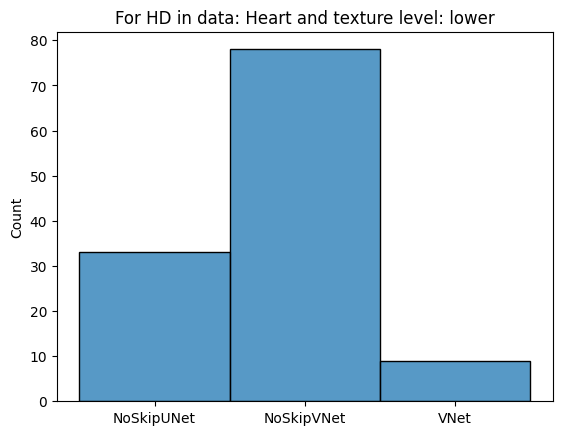

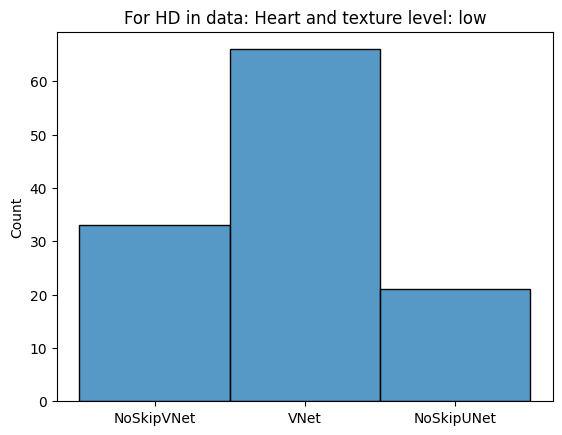

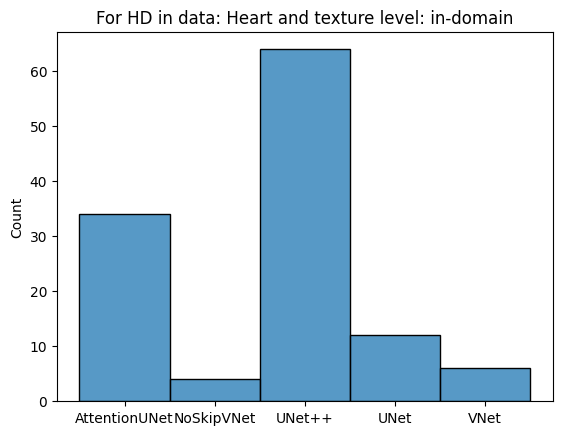

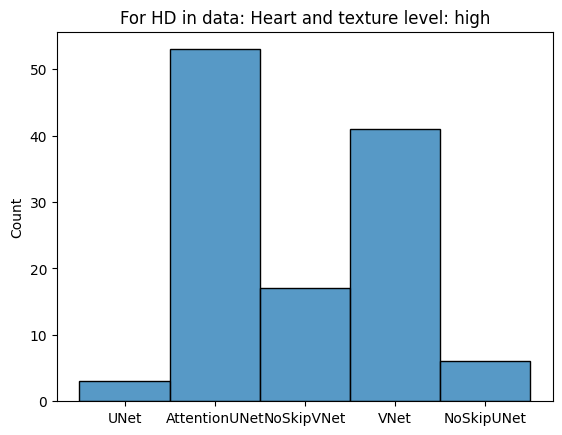

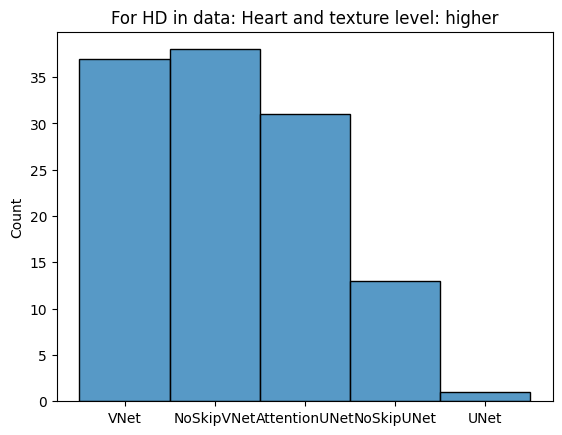

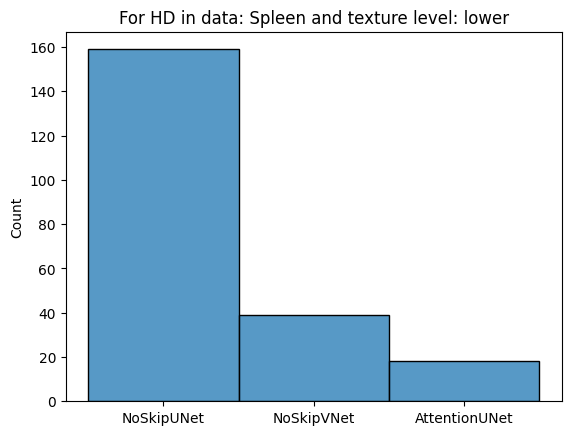

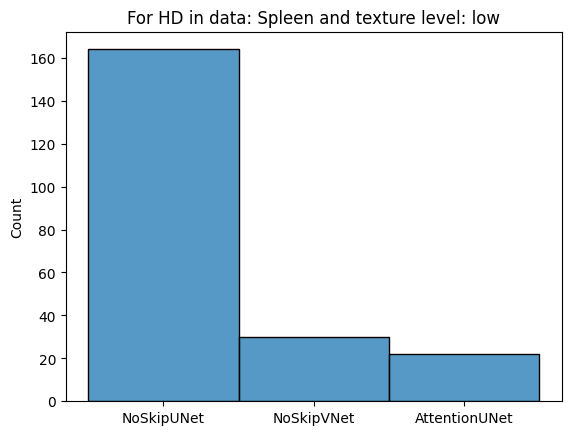

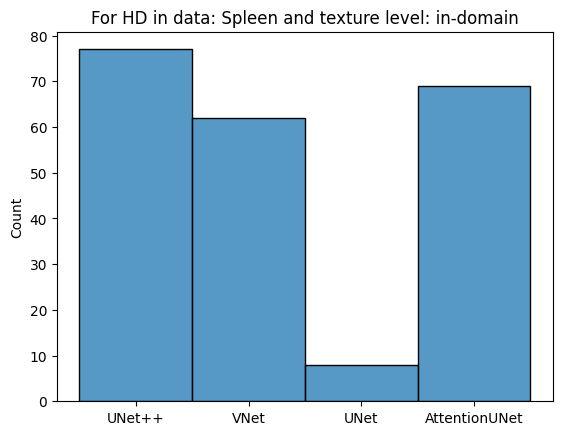

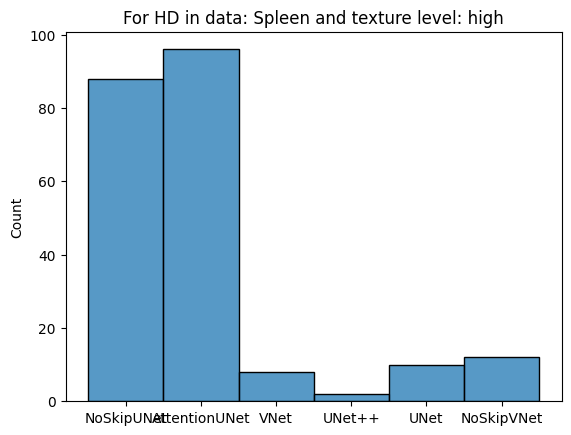

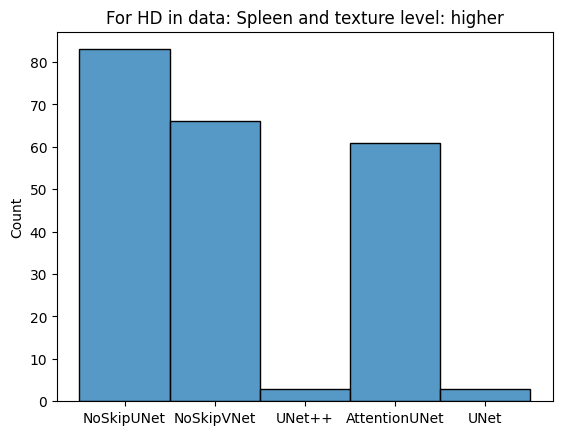

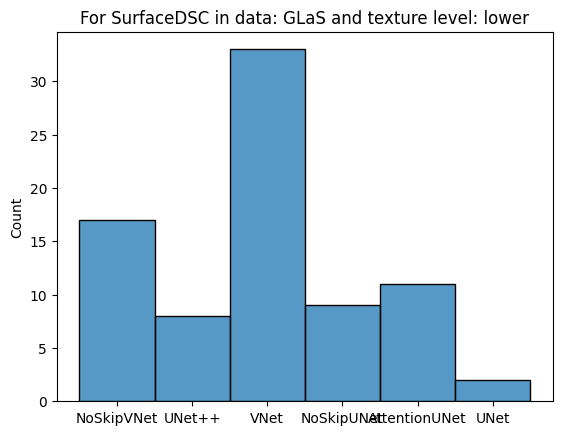

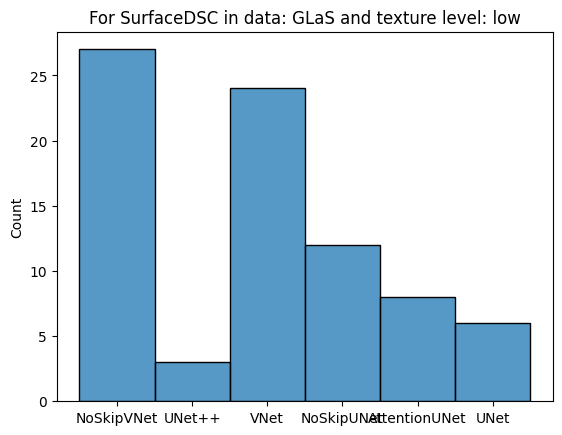

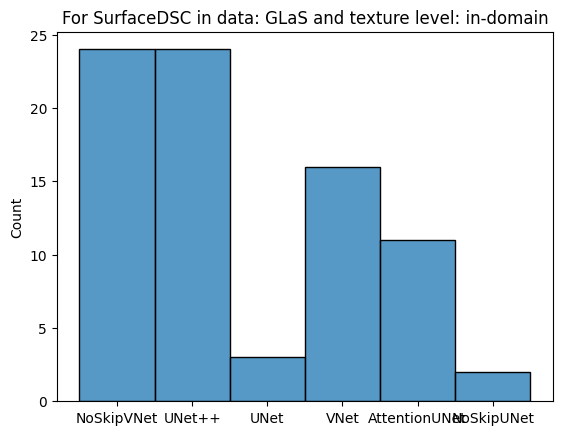

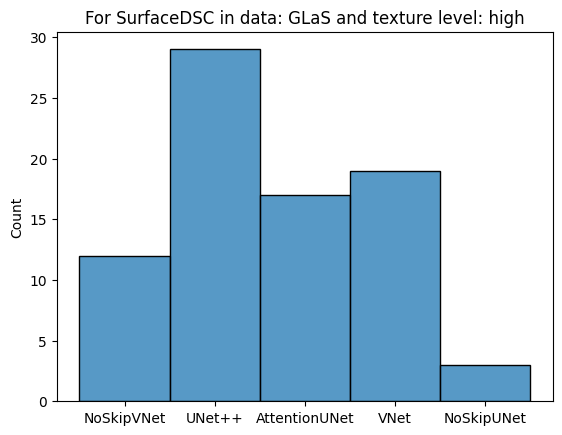

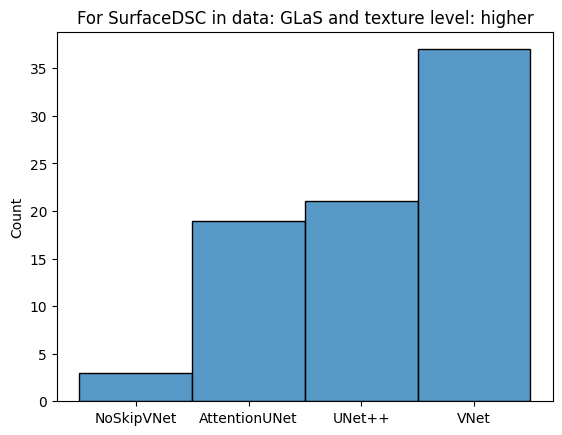

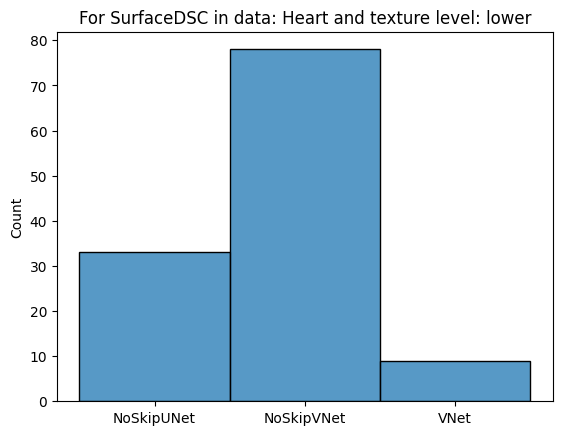

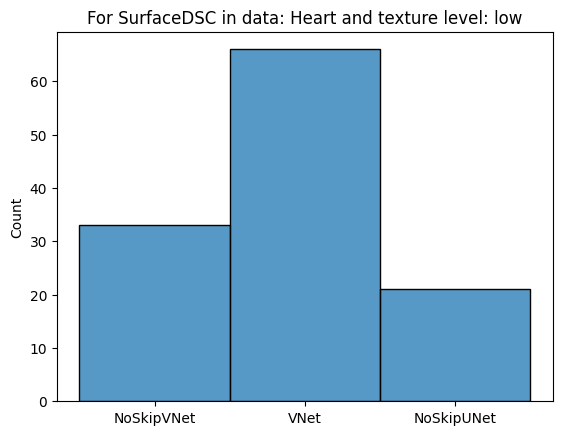

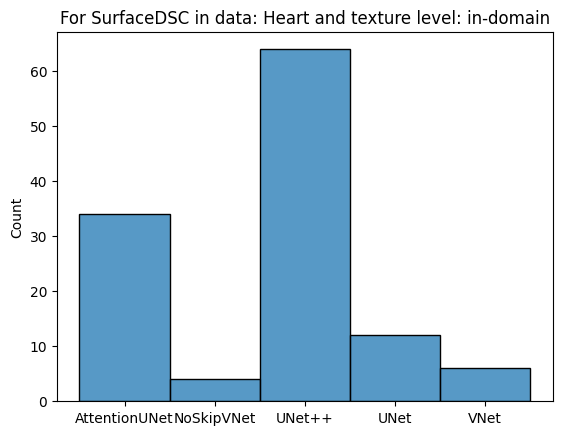

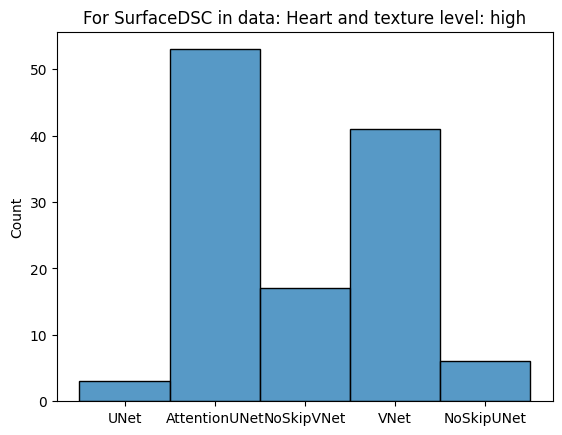

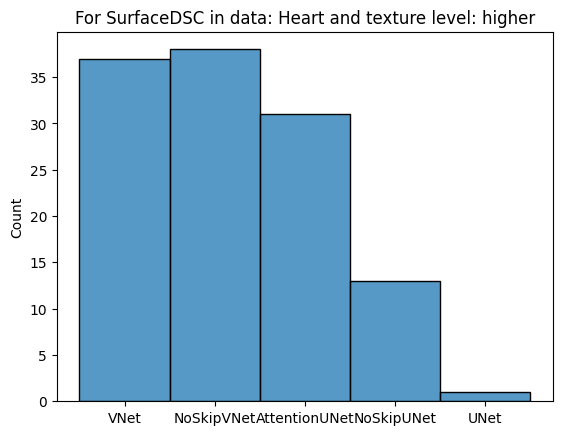

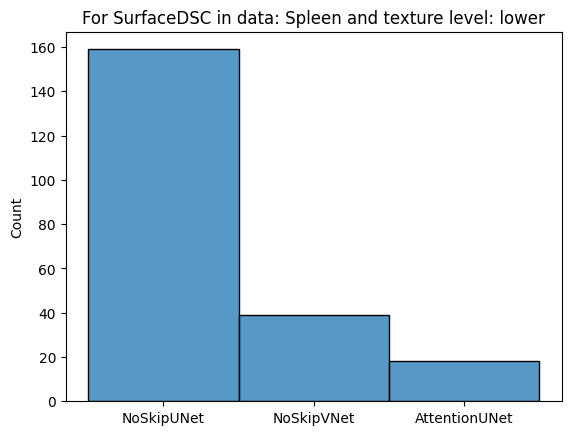

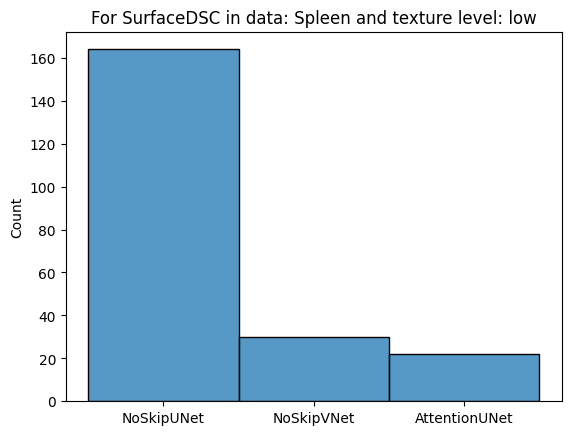

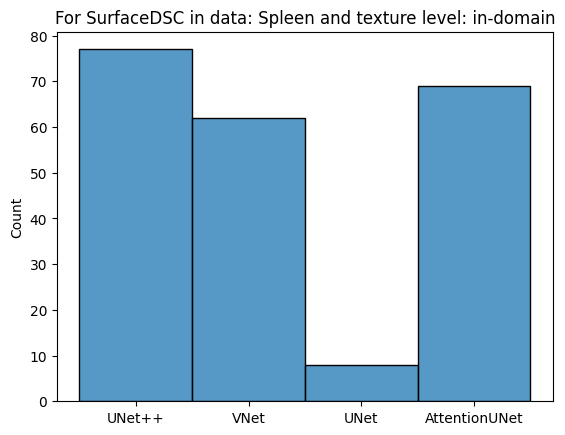

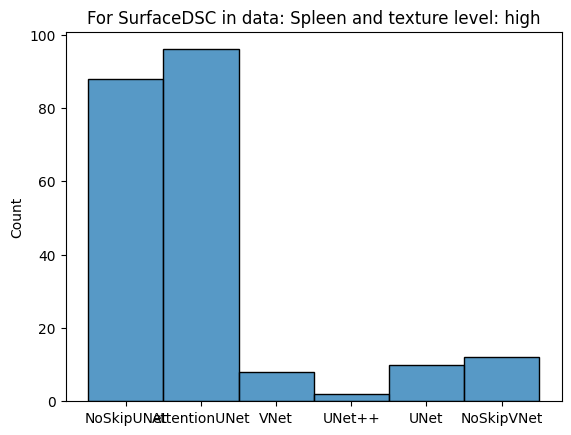

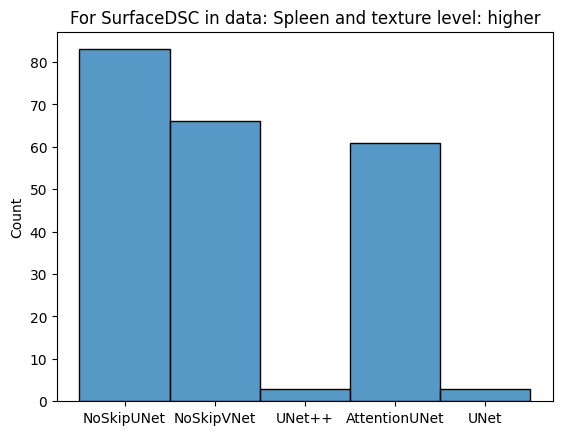

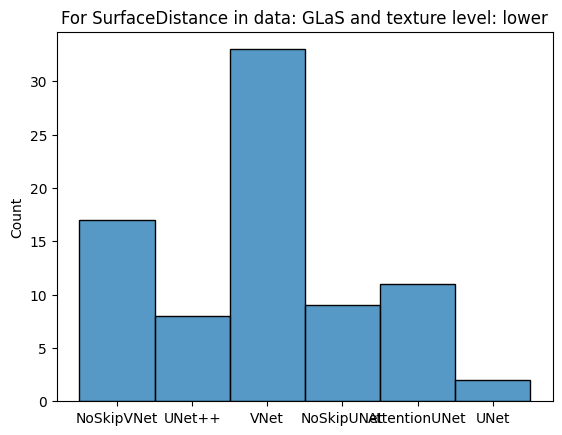

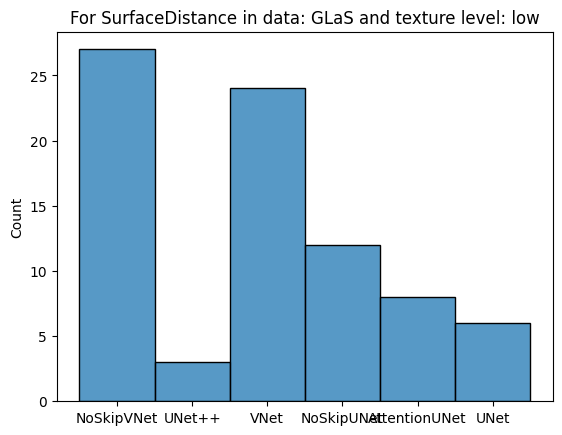

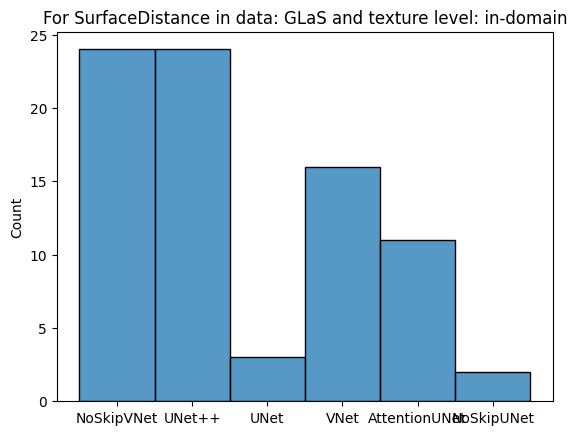

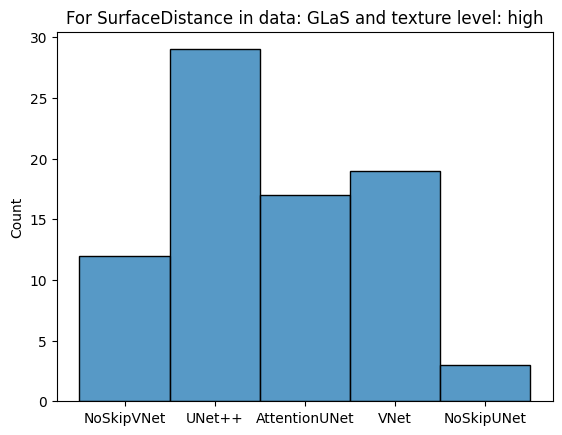

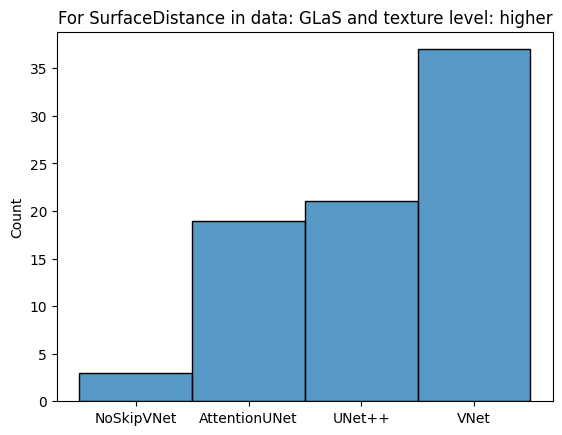

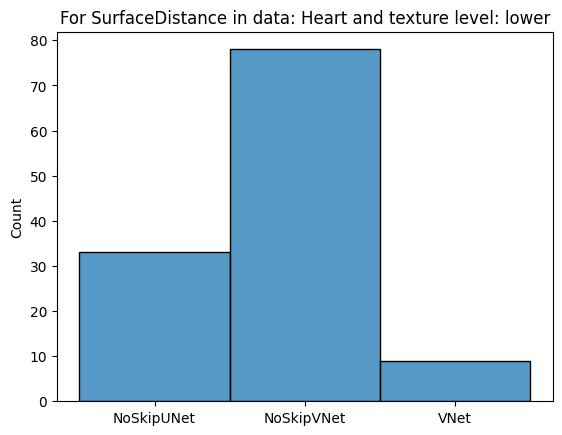

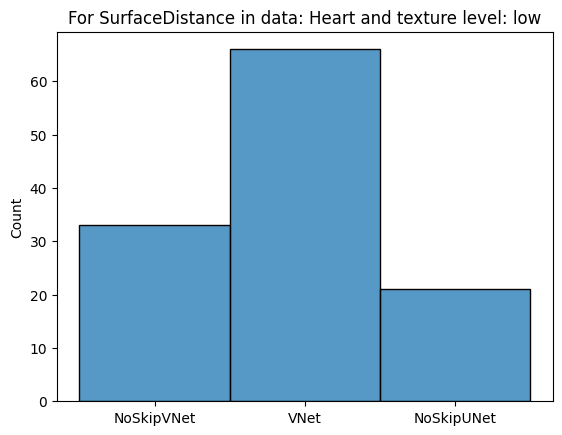

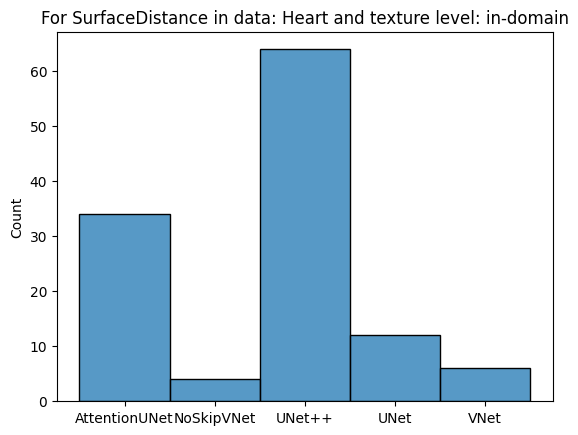

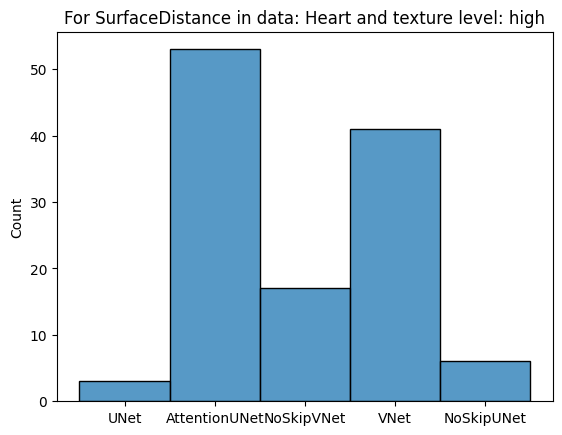

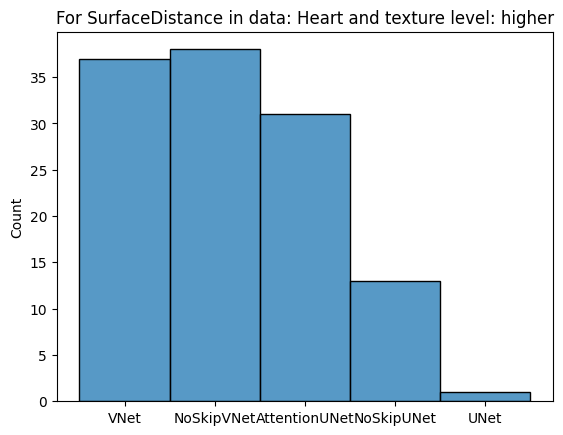

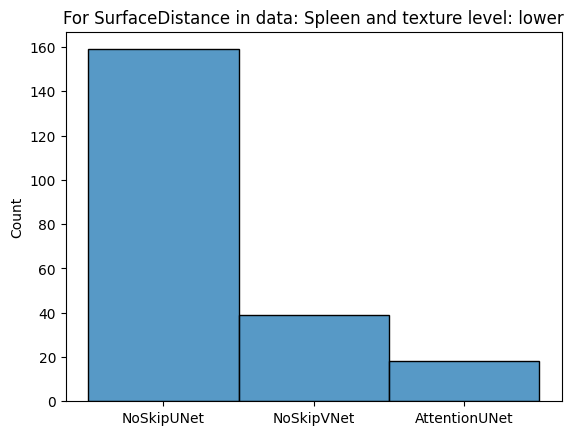

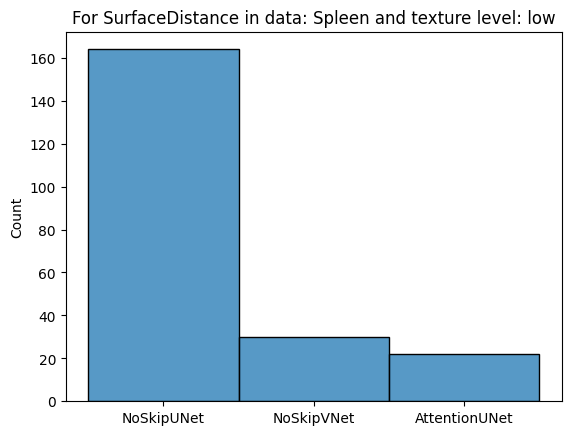

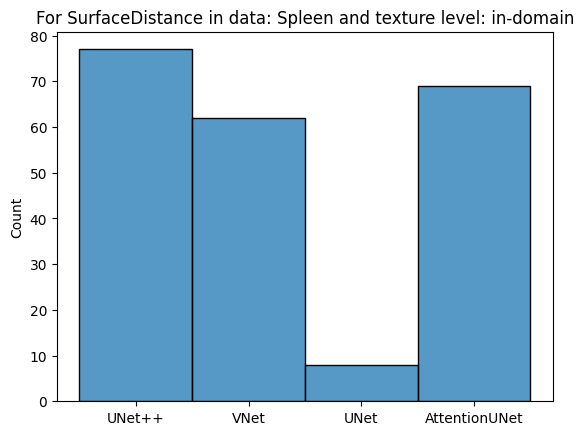

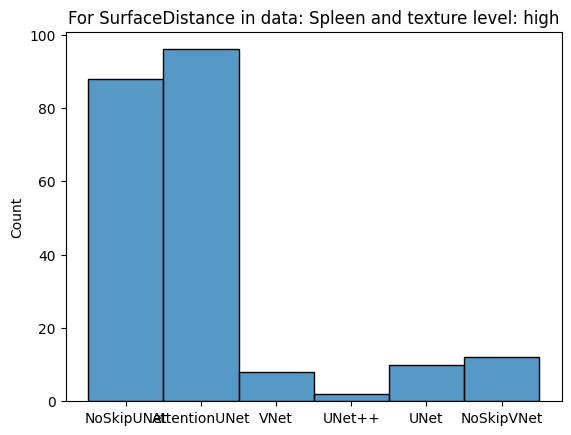

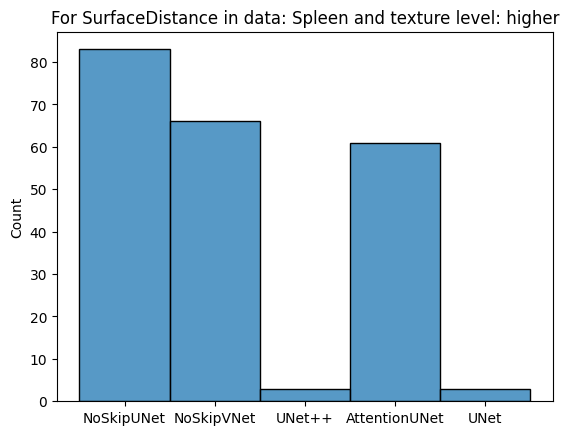

In [3]:
for metric in metric_list:
    for anatomy in anatomy_list:
        sdsc_ranking = pd.DataFrame(columns=variant_list)
        for texture_variant in variant_list:
            sdsc_mean = pd.DataFrame(columns=model_list)
            for model_name in model_list:
                result_seed_1 = os.path.join(results_path, anatomy + "-results", anatomy + "_stats_" + model_name + "_" + texture_variant + "_256_1.csv")
                result_seed_2 = os.path.join(results_path, anatomy + "-results", anatomy + "_stats_" + model_name + "_" + texture_variant + "_256_2.csv")
                result_seed_3 = os.path.join(results_path, anatomy + "-results", anatomy + "_stats_" + model_name + "_" + texture_variant + "_256_3.csv")

                seed_1_data = pd.read_csv(result_seed_1)
                seed_1_data = seed_1_data.loc[seed_1_data['Set'] == "test"]

                seed_2_data = pd.read_csv(result_seed_2)
                seed_2_data = seed_2_data.loc[seed_2_data['Set'] == "test"]

                seed_3_data = pd.read_csv(result_seed_3)
                seed_3_data = seed_3_data.loc[seed_3_data['Set'] == "test"]

                per_model_mean_scores = np.mean(np.vstack((seed_1_data["SurfaceDSC"].to_numpy(), seed_2_data["SurfaceDSC"].to_numpy(), seed_3_data["SurfaceDSC"].to_numpy())).T, axis=1)
                per_model_mean_scores[~np.isfinite(per_model_mean_scores)] = np.sqrt(2) * 256

                sdsc_mean[model_name] = per_model_mean_scores
            
            #print(sdsc_mean)
            
            best_model = sdsc_mean.idxmax(axis=1, skipna=True)
            plt.figure()
            sns.histplot(best_model)
            plt.title("For " + metric + " in data: " + anatomy + " and texture level: " + texture_variant)
